In [ ]:
!git init
!git clone https://github.com/neuraloperator/neuraloperator.git

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/
Cloning into 'neuraloperator'...
remote: Enumerating objects: 13981, done.
remote: Counting objects: 100% (1416/1416), done.
remote: Compressing objects: 100% (482/482), done.
remote: Total 13981 (delta 1158), reused 934 (delta 934), pack-reused 12565 (from 3)
Receiving objects: 100% (13981/13981), 108.93 MiB | 32.75 MiB/s, done.
Resolving deltas: 100% (9198/9198), done.


In [ ]:
!pip install neuraloperator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 11.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.9/186.9 kB 8.1 MB/s eta 0:00:00
  Created wheel for torch-harmonics: filename=torch_harmonics-0.7.3-py3-none-any.whl size=87749 sha256=50e5b40b5e6c7ce9100c21063de95e8c1cb133a4a7d6844958942076c1ce33d9
  Stored in directory: /root/.cache/pip/wheels/53/e5/23/5dd311b49596ed8933fba1240082719666e03b07e148f90234
Successfully built torch-harmonics
  Attempting uninstall: torch-harmonics
    Found existing installation: torch_harmonics 0.8.0
    Uninstalling torch_harmonics-0.8.0:
      Successfully uninstalled torch_harmonics-0.8.0


In [ ]:
!cd neuraloperator

In [ ]:
!pip install -r /content/neuraloperator/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 54.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 78.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 89.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.1/753.1 kB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 4.6 MB/s eta 0:00:00
  Created wheel for torch-harmonics: filename=torch_harmonics-0.8.0-py3-none-any.whl size=162234 sha256=6ee84629092dcc212c00daf49ffaaf09c792dfc94b56ce6372b97f00e1b47a8e
  Stored in directory: /root/.cache/pip/wheels/de/35/f6/520d03aca

In [ ]:
import numpy as np
import torch
import matplotlib
import matplotlib.pyplot as plt
import neuraloperator.neuralop
from neuraloperator.neuralop.data.datasets import load_mini_car

font = {'size' : 12}
matplotlib.rc('font', **font)

torch.manual_seed(0)
np.random.seed(0)

In [ ]:
data_list = load_mini_car()

In [ ]:
sample = data_list[0]
print(f'{sample.keys()=}')

sample.keys()=dict_keys(['vertices', 'vertex_normals', 'triangle_normals', 'centroids', 'triangle_areas', 'distance', 'closest_points', 'normalized_triangle_areas', 'press', 'query_points'])


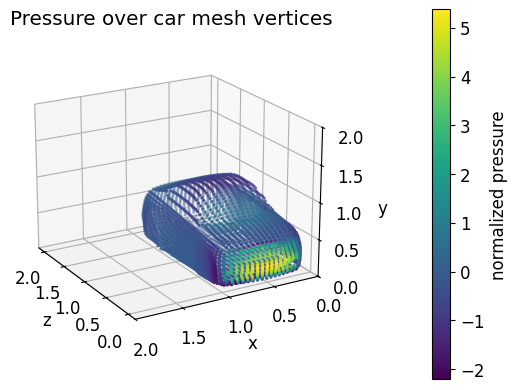

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# By default the data is normalized into the unit cube. To get a
# better look at it, we scale the z-direction up.
scatter = ax.scatter(sample['vertices'][:,0],sample['vertices'][:,1],
                     sample['vertices'][:,2]*2, s=2, c=sample['press'])
ax.set_xlim(0,2)
ax.set_ylim(0,2)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.view_init(elev=20, azim=150, roll=0, vertical_axis='y')
ax.set_title("Pressure over car mesh vertices")
fig.colorbar(scatter, pad=0.2, label="normalized pressure", ax=ax)
plt.draw()

Text(0.5, 0.92, 'Query points and vertices')

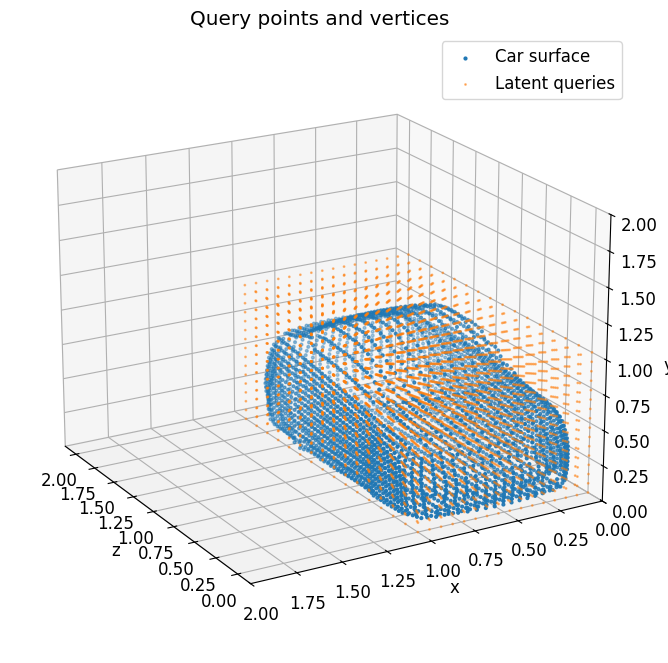

In [ ]:
fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(sample['vertices'][:,0],sample['vertices'][:,1],
                     sample['vertices'][:,2]*2, s=4, label='Car surface')
queries = sample['query_points'].view(-1, 3) # unroll our cube tensor into a point cloud
ax.scatter(queries[:,0],queries[:,1],queries[:,2]*2,s=1, alpha=0.5, label='Latent queries')

ax.set_xlim(0,2)
ax.set_ylim(0,2)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.legend()
ax.view_init(elev=20, azim=150, roll=0, vertical_axis='y')
ax.set_title("Query points and vertices")

In [ ]:
from neuralop.layers.neighbor_search import native_neighbor_search
verts = sample['vertices']
#query_point = queries[1000]
query_point = queries[3300] # 1550 and 0.4 is really good
#nbr_data = native_neighbor_search(data=verts, queries=query_point.unsqueeze(0), radius=0.15)
nbr_data = native_neighbor_search(data=verts, queries=query_point.unsqueeze(0), radius=0.5)

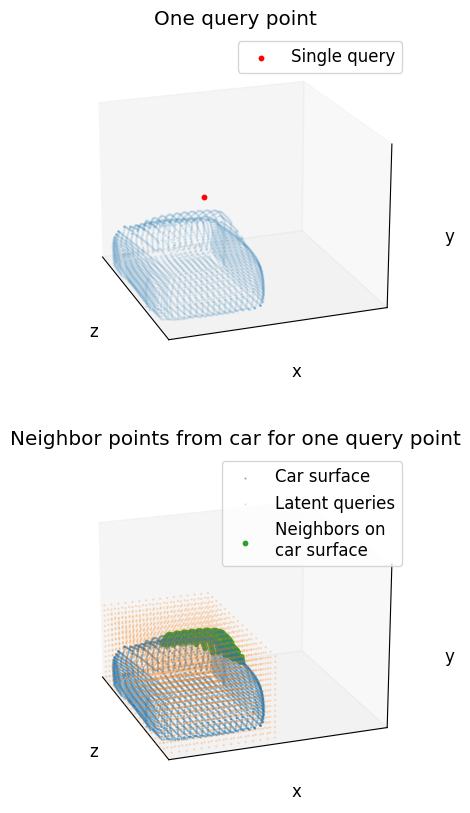

In [ ]:
fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(2,1,1, projection='3d')
ax2 = fig.add_subplot(2,1,2, projection='3d')
neighbors = verts[nbr_data['neighbors_index']]

# Plotting just one query point vs. the car
ax1.scatter(verts[:, 0], verts[:, 1], verts[:, 2]*2, s=1, alpha=0.1)
ax1.scatter(query_point[0], query_point[1], query_point[2]*2, s=10, c='red', label='Single query')
ax1.view_init(elev=20, azim=-20, roll=0, vertical_axis='y')
ax1.legend()
ax1.set_xlim(0,2)
ax1.set_ylim(0,2)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")
ax1.view_init(elev=20, azim=-20, roll=0, vertical_axis='y')
ax1.grid(False)
ax1.set_title("One query point")

# Plotting all query points and neighbors
ax2.scatter(verts[:, 0], verts[:, 1], verts[:, 2]*2, s=0.5, alpha=0.4, label="Car surface")
ax2.scatter(queries[:, 0], queries[:, 1], queries[:, 2]*2, s=0.5, alpha=0.2, label="Latent queries")
ax2.scatter(neighbors[:, 0], neighbors[:, 1], neighbors[:, 2]*2, s=10, label="Neighbors on\ncar surface",)
ax2.legend()
ax2.set_xlim(0,2)
ax2.set_ylim(0,2)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z")
ax2.view_init(elev=20, azim=-20, roll=0, vertical_axis='y')
ax2.set_title("Neighbor points from car for one query point")
ax2.grid(False)

for ax in ax1,ax2:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
plt.draw()

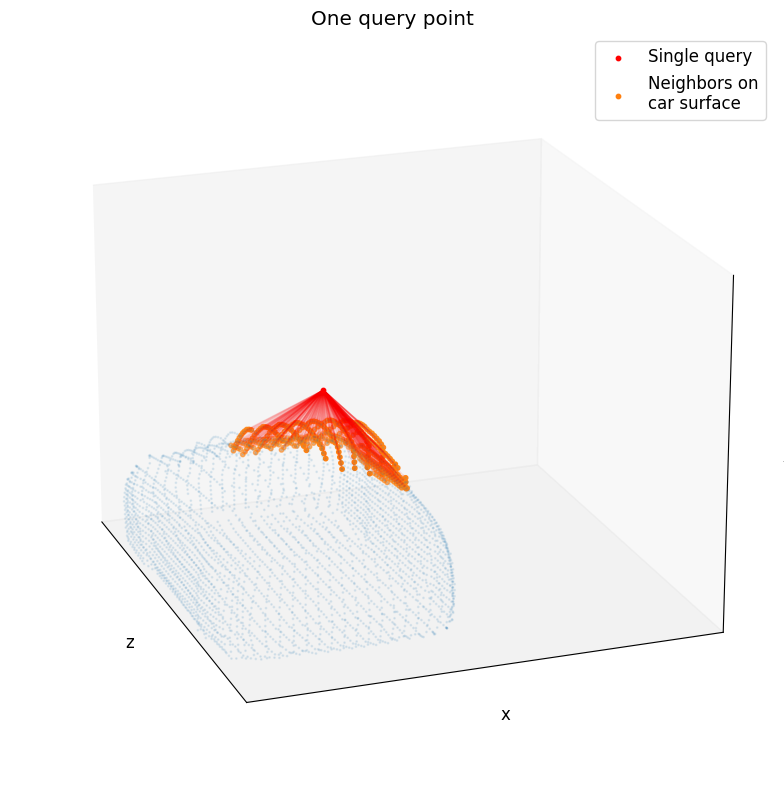

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))

        return np.min(zs)

# Creating plots
fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(projection='3d')
neighbors = verts[nbr_data['neighbors_index']]

# Plotting just one query point vs. the car
ax1.scatter(verts[:, 0], verts[:, 1], verts[:, 2]*2, s=1, alpha=0.1)
ax1.scatter(query_point[0], query_point[1], query_point[2]*2, s=10, c='red', label='Single query')
ax1.scatter(neighbors[:, 0], neighbors[:, 1], neighbors[:, 2]*2, s=10, label="Neighbors on\ncar surface",)

ax1.view_init(elev=20, azim=-20, roll=0, vertical_axis='y')
ax1.legend()
ax1.set_xlim(0,2)
ax1.set_ylim(0,2)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")
ax1.view_init(elev=20, azim=-20, roll=0, vertical_axis='y')
ax1.grid(False)
ax1.set_title("One query point")


for ax in [ax1]:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

# Add arrows between neighbors and query
arrow_prop_dict = dict(mutation_scale=1, arrowstyle='-|>', color='red', shrinkA=1, shrinkB=1, alpha=0.1)
for nbr in neighbors:
    a = Arrow3D([query_point[0], nbr[0]],
                [query_point[1], nbr[1]],
                [query_point[2]*2, nbr[2]*2], **arrow_prop_dict)
    ax1.add_artist(a)

fig.tight_layout()
plt.draw()